In [8]:
%reload_ext autoreload
%autoreload 2
from library.signal_define import  QamSignal
from library.optics import  Mux,Laser,Edfa
from library.channel import NonlinearFiber

In [9]:
def generate_wdm_signal(nch=3):
    lasers = [Laser(0,False,193.45e12 + i*50e9,0) for i in range(3)]
    signals = [QamSignal(16,35e9,2,8,65536,2) for _ in range(3)]
    
    for laser,sig in zip(lasers,signals):
        sig = sig.prepare(0.1,True)
        sig = laser.prop(sig)
    
    wdm_signal = Mux.mux_signal(signals)
    return wdm_signal

In [10]:
 from library.channel import NonlinearFiber
wdm_signal = generate_wdm_signal()
wdm_signal.cpu()

In [11]:
fiber = NonlinearFiber(0.2,16.7,80,1550,0,'double')

In [ ]:
fiber.prop(wdm_signal)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
double_trans = loadmat('after_transimt_double_accuracy')

In [5]:
x = double_trans['wdm_samples']

In [12]:
float_trans = loadmat('after_transimt_single_accuracy')['wdm_samples']

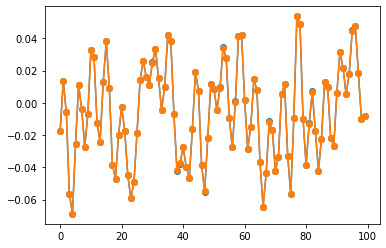

In [13]:
plt.plot(np.arange(100),x[0,:100].real,np.arange(100),float_trans[0,:100].real,marker='o')

In [17]:
rmse = (np.abs((float_trans.imag - x.imag))**2).mean(axis=-1)

In [18]:
rmse

array([9.92612999e-09, 9.91138755e-09])

In [21]:
(np.abs(float_trans)**2).mean(axis=-1).sum()

0.002984602

In [24]:
matlab_res = loadmat('wdm_after_prop_matlabversion.mat')['samples_in_fiber']

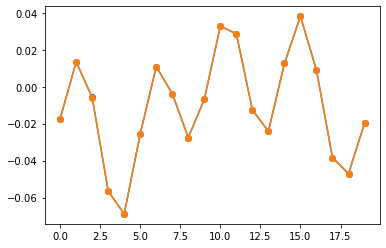

In [27]:
plt.plot(np.arange(20),x[0,:20].real,np.arange(20),matlab_res[0,:20].real,marker='o')

In [28]:
matlab_res.shape


(2, 524288)

In [29]:
65536*8

524288

In [33]:
from library.signal_define import WdmSignal
signal = WdmSignal.load('h:/ai/bermargin/item_0')

In [34]:
signal

In [35]:
signal.wdm_samples

array([[-0.00229544-0.03126008j,  0.02208973-0.01046347j,
         0.01450127+0.00269369j, ...,  0.0349743 -0.0404684j ,
        -0.0003746 -0.04710398j, -0.02196979-0.04424275j],
       [-0.00216132+0.0318122j , -0.00204843+0.02937645j,
        -0.00373815+0.01040107j, ...,  0.00363493-0.01293568j,
         0.00090742-0.01024574j, -0.00098034+0.01124246j]],
      dtype=complex64)